In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pickle

from numpy.random import seed

from sklearn import cross_validation, datasets, tree, preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense, Convolution1D, Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

from flask import Flask, request

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
%matplotlib inline
seed(1)

In [3]:
titanic_df = pd.read_csv('titanic_dataset.csv')

In [4]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [6]:
titanic_df = titanic_df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [7]:
group_by_age = pd.cut(titanic_df['age'], np.arange(0, 90, 10))

In [8]:
group_by_age.head()

0    (20, 30]
1     (0, 10]
2     (0, 10]
3    (20, 30]
4    (20, 30]
Name: age, dtype: category
Categories (8, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [9]:
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping

,pclass,survived,age,sibsp,parch,fare
age,,,,,,
"(0, 10]",2.651163,0.581395,4.304264,1.709302,1.406977,29.436044
"(10, 20]",2.524691,0.395062,17.283951,0.611111,0.395062,28.807050
"(20, 30]",2.371191,0.371191,25.324100,0.326870,0.218837,28.159013
"(30, 40]",2.109524,0.423810,35.121429,0.361905,0.414286,42.701507
"(40, 50]",1.787879,0.393939,45.367424,0.378788,0.409091,47.254231
"(50, 60]",1.387097,0.483871,55.185484,0.419355,0.370968,61.943347
"(60, 70]",1.518519,0.222222,63.537037,0.333333,0.444444,66.131250
"(70, 80]",1.666667,0.333333,73.750000,0.166667,0.000000,34.755567


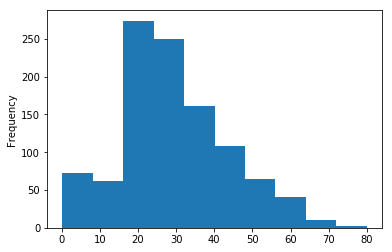

In [10]:
titanic_df['age'].plot.hist()

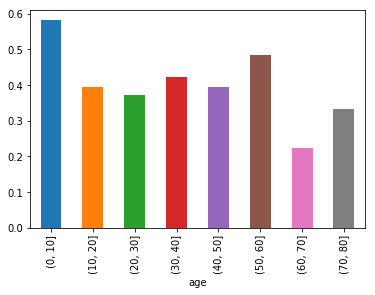

In [11]:
age_grouping['survived'].plot.bar()

In [12]:
titanic_df = titanic_df.dropna(axis=0)

In [13]:
titanic_df.count()

pclass      1043
survived    1043
name        1043
sex         1043
age         1043
sibsp       1043
parch       1043
ticket      1043
fare        1043
embarked    1043
dtype: int64

In [14]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [15]:
processed_titanic_df = titanic_df.copy()

label_enc = preprocessing.LabelEncoder()

In [16]:
processed_titanic_df.sex = label_enc.fit_transform(processed_titanic_df.sex)
processed_titanic_df.embarked = label_enc.fit_transform(processed_titanic_df.embarked)

In [17]:
processed_titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,2
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,2
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,2
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,2
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,2
5,1.0,1.0,"Anderson, Mr. Harry",1,48.0000,0.0,0.0,19952,26.5500,2
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",0,63.0000,1.0,0.0,13502,77.9583,2
7,1.0,0.0,"Andrews, Mr. Thomas Jr",1,39.0000,0.0,0.0,112050,0.0000,2
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",0,53.0000,2.0,0.0,11769,51.4792,2
9,1.0,0.0,"Artagaveytia, Mr. Ramon",1,71.0000,0.0,0.0,PC 17609,49.5042,0


In [18]:
processed_titanic_df = processed_titanic_df.drop(columns=['name', 'ticket'])

In [19]:
processed_titanic_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,2


In [20]:
processed_titanic_df.to_csv('processed_titanic.csv')

In [21]:
x = processed_titanic_df.drop(columns=['survived'])
y = processed_titanic_df['survived'].values

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [23]:
print("Training data size x: {0}".format(x_train.shape))
print("Training data size y: {0}".format(y_train.shape))
print("Validation data size x: {0}".format(x_val.shape))
print("Validation data size y: {0}".format(y_val.shape))

Training data size x: (834, 7)
Training data size y: (834,)
Validation data size x: (209, 7)
Validation data size y: (209,)


## Scikit Learn Decision Tree Classifier

In [24]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 8, random_state=1)

decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [25]:
decision_tree.score(x_val, y_val)

0.7942583732057417

In [26]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked
651,3.0,1,30.0,0.0,0.0,7.225,0
1272,3.0,1,47.0,0.0,0.0,9.000,2
279,1.0,1,62.0,0.0,0.0,26.550,2
255,1.0,0,24.0,0.0,0.0,69.300,0
966,3.0,0,25.0,0.0,0.0,7.775,2


In [27]:
test = [1, 0, 40, 1, 0, 100, 2]

In [28]:
test = list(test)

In [29]:
test

[1, 0, 40, 1, 0, 100, 2]

In [30]:
filename = "decision_tree_weights.sav"
pickle.dump(decision_tree, open(filename, 'wb'))

In [31]:
testA = np.zeros((1, 7))

In [32]:
testA[0] = test

In [33]:
testA

array([[  1.,   0.,  40.,   1.,   0., 100.,   2.]])

In [34]:
decision_tree.predict(testA)[0]

1.0

## Keras Binary Classifier Model

In [1]:
def build_model():
    model = Sequential()
    model.add(Dense(10, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation="relu"))
    model.add(Dense(1, kernel_initializer='normal', activation="sigmoid"))
    model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
estimator = []
estimator.append(('standardize', StandardScaler()))
estimator.append(('mlp', KerasClassifier(build_fn=build_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimator)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, x, y, cv=kfold)

In [37]:
print("Accuracy: {0}".format(results.mean()*100))

Accuracy: 80.9194147893


In [ ]:
predicted = cross_val_predict(pipeline, x, y, cv=kfold)

In [ ]:
metrics.accuracy_score(y, predicted)

In [ ]:
passenger = np.array([[3, 0, 5, 3, 2, 50, 0]])
passenger_label = np.array([1])

In [ ]:
pipeline.fit(x_train, y_train)

In [ ]:
pipeline.score(x_val, y_val)

In [ ]:
pipeline.predict(passenger)